In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sahoo\Downloads\customer_data (1).csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Univariant Analysis

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


(<seaborn.axisgrid.FacetGrid at 0x2319b6c1670>,)

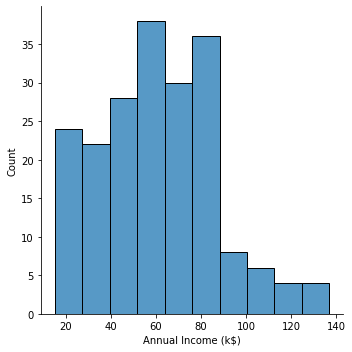

In [5]:
sns.displot(data=df,x='Annual Income (k$)'),

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

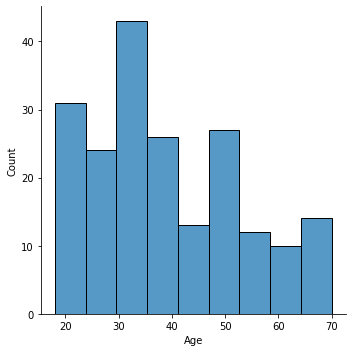

<Figure size 432x288 with 0 Axes>

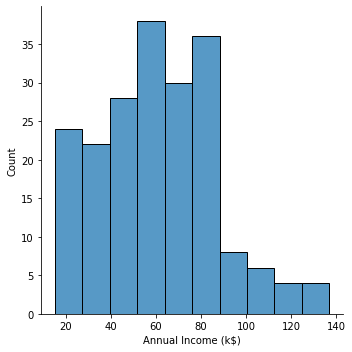

<Figure size 432x288 with 0 Axes>

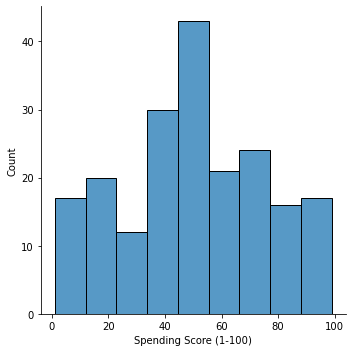

In [7]:
columns=[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.displot(df[col])

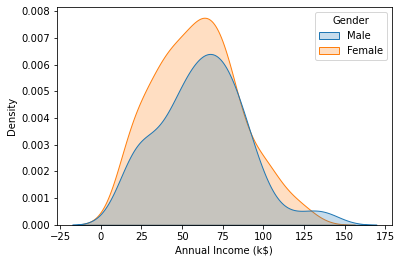

In [8]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

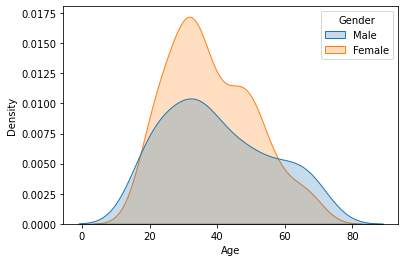

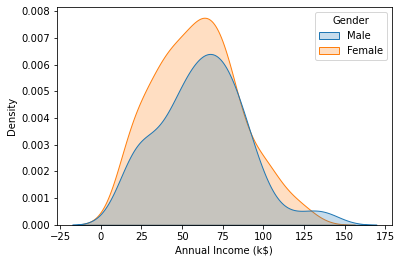

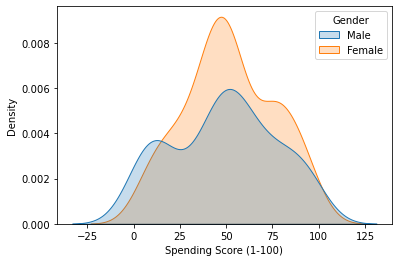

In [9]:
columns=[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(df[col],shade=True,hue=df['Gender']);

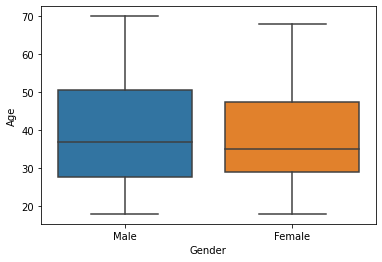

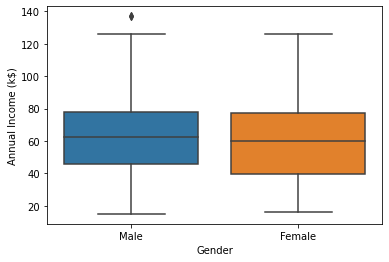

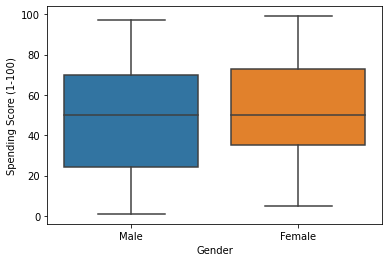

In [10]:
columns=[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[col]);

In [11]:
# Count By Gender
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
# Gender Percent
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

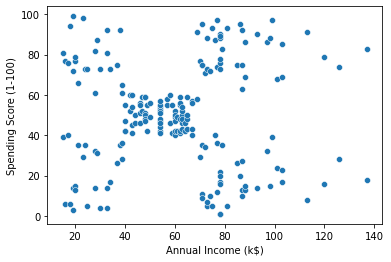

In [13]:
#Bivariant Analysis
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)');

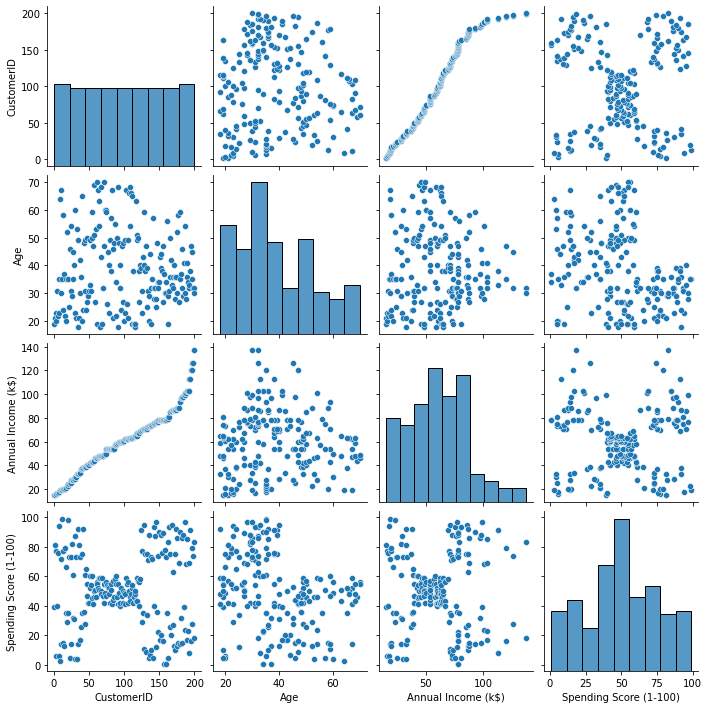

In [14]:
sns.pairplot(df)

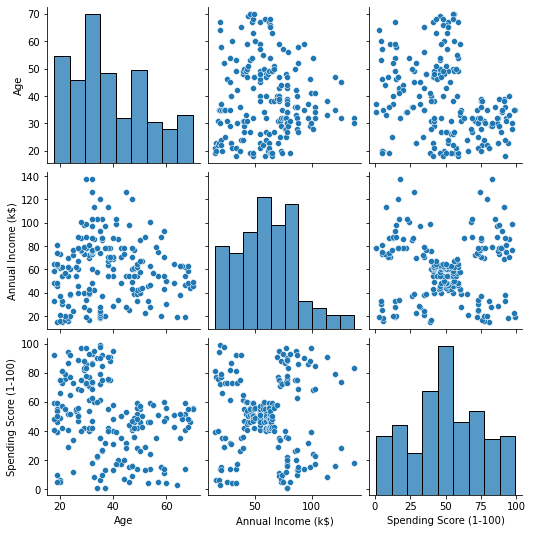

In [15]:
# Drop CustomerID
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

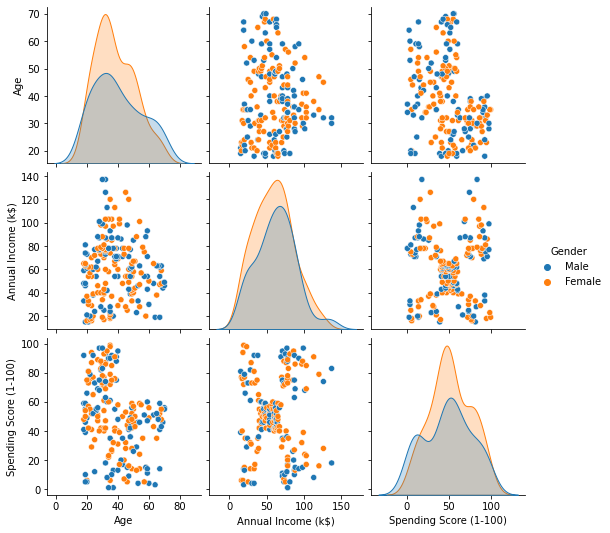

In [16]:
# By Gender
sns.pairplot(df,hue='Gender')

In [17]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

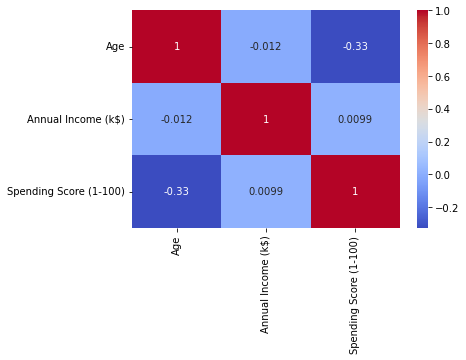

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [20]:
# Univariant Clustering 

#INITIATE
cluster1=KMeans()

In [21]:
#FIT into data
cluster1.fit(df[['Annual Income (k$)']])

KMeans()

In [22]:
#LABELLING
cluster1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3])

In [23]:
df['Income Cluster']= cluster1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [24]:
# count of the number of customers in each cluster
df['Income Cluster'].value_counts()

7    42
4    36
2    32
0    28
6    26
1    16
5    14
3     6
Name: Income Cluster, dtype: int64

In [25]:
# Finding the ideal number of clusters by Elbow method
cluster1.inertia_

2822.4996947496957

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)


In [27]:
inertia_scores


[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 4138.536507936509,
 2822.4996947496957,
 2285.2271645021656,
 1758.1453823953825]

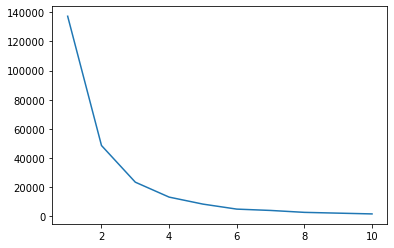

In [28]:
plt.plot(range(1,11),inertia_scores)

In [29]:
#using 3 as the number of clusters
cluster1=KMeans(n_clusters=3)
cluster1.fit(df[['Annual Income (k$)']])
cluster1.labels_
df['Income Cluster']= cluster1.labels_
df.head()
df['Income Cluster'].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [30]:
df. columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [31]:
#Analysis
df.groupby('Income Cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Annual Income (k$),Spending Score (1-100)
Income Cluster,,
0,66.717391,50.054348
1,99.888889,50.638889
2,33.027778,50.166667


In [32]:
# Bivariant and Multivatiant Clustering

cluster2=KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
cluster2.labels_
df['Spending and Income Cluster']= cluster2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,1
2,Female,20,16,6,2,3
3,Female,23,16,77,2,1
4,Female,31,17,40,2,3


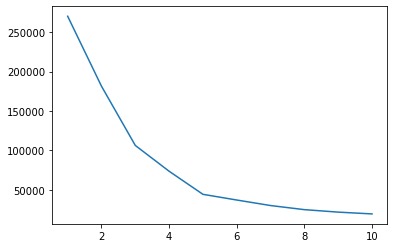

In [33]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)


In [34]:
#Finding Centres to help with Visualization
centre=pd.DataFrame(cluster2.cluster_centers_)
centre.columns=['x','y']


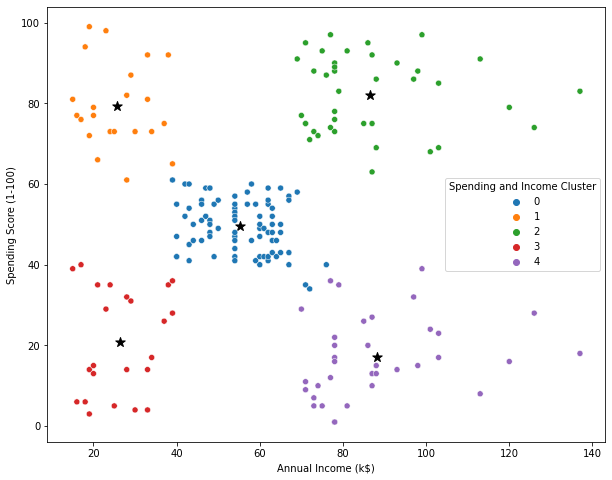

In [35]:
# Visualizations by scatterplots
# Increase figure size
plt.figure(figsize=(10,8))
plt.scatter(x=centre['x'],y=centre['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
# to save figure
plt.savefig('bivariant_cluster.png')

In [36]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [37]:
#Analysis
df.groupby('Spending and Income Cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,
0,55.296296,49.518519
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,88.200000,17.114286


In [38]:
# Multivariant Clustering
from sklearn.preprocessing import StandardScaler

In [39]:
scale=StandardScaler()

In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,1
2,Female,20,16,6,2,3
3,Female,23,16,77,2,1
4,Female,31,17,40,2,3


In [41]:
dff=pd.get_dummies(df)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,19,15,39,2,3,0,1
1,21,15,81,2,1,0,1
2,20,16,6,2,3,1,0
3,23,16,77,2,1,1,0
4,31,17,40,2,3,1,0


In [42]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,3,1
1,21,15,81,2,1,1
2,20,16,6,2,3,0
3,23,16,77,2,1,0
4,31,17,40,2,3,0


In [43]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [44]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [45]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [48]:
dff= pd.DataFrame(scale.fit_transform(dff))

In [49]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


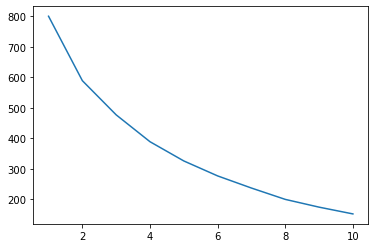

In [52]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [53]:
cluster3=KMeans(n_clusters=4)
cluster3.fit(dff)
cluster3.labels_
dff['Spending,Income,Age and gender Cluster']= cluster3.labels_
dff.head()

,0,1,2,3,"Spending,Income,Age and gender Cluster"
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,1
2,-1.352802,-1.700830,-1.715913,-0.886405,0
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,0


In [56]:
dff= pd.DataFrame(scale.fit_transform(dff))

In [57]:
dff.head()

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,1.128152,-0.422911
1,-1.281035,-1.738999,1.195704,1.128152,-0.422911
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.277276
3,-1.137502,-1.700830,1.040418,-0.886405,1.285820
4,-0.563369,-1.662660,-0.395980,-0.886405,-1.277276


<AxesSubplot:xlabel='1', ylabel='2'>

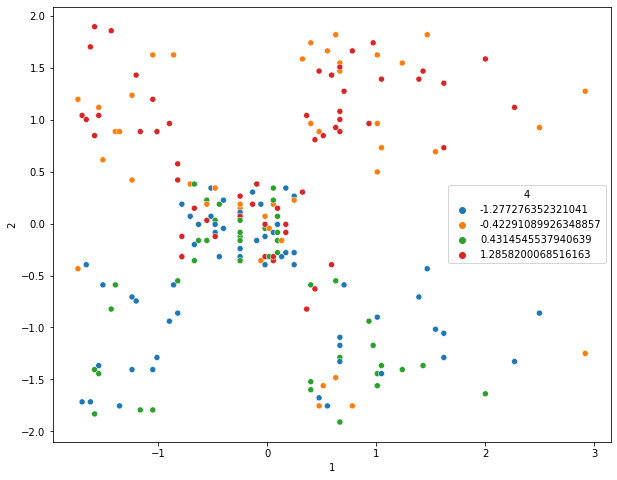

In [59]:
#Visualization
plt.figure(figsize=(10,8))
sns.scatterplot(data=dff,x=1, y=2,hue=4,palette='tab10')